In [1]:
import wug_api_data
wug_api_data.init()
wug_api_data.wug_data_clean()
wug_api_data.wug_data_features()
from wug_api_data import *

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

In [4]:
k_means_df = combined_weather_df.drop(['date', 'fog', 'rain', 'meantempm', 'meanpressurem', 
                                       'maxhumidity', 'minhumidity', 'maxtempm', 'mintempm', 
                                       'maxdewptm', 'mindewptm', 'maxpressurem', 
                                       'minpressurem', 'precipm', 'year', 'month', 
                                       'day', 'dayofweek'], axis=1)
k_means_df = k_means_df.dropna()

In [19]:
k_means_df.to_csv('data/wind_speed_dewpt.csv')

In [5]:
combined_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7529 entries, 0 to 7672
Data columns (total 21 columns):
date             7529 non-null datetime64[ns]
fog              7529 non-null int64
rain             7529 non-null int64
meanwdird        7529 non-null int64
meanwindspdm     7529 non-null float64
meantempm        7529 non-null float64
meandewptm       7529 non-null float64
meanpressurem    7529 non-null float64
maxhumidity      7529 non-null float64
minhumidity      7529 non-null float64
maxtempm         7529 non-null float64
mintempm         7529 non-null float64
maxdewptm        7529 non-null float64
mindewptm        7529 non-null float64
maxpressurem     7529 non-null float64
minpressurem     7529 non-null float64
precipm          7529 non-null float64
year             7529 non-null int64
month            7529 non-null int64
day              7529 non-null int64
dayofweek        7529 non-null int64
dtypes: datetime64[ns](1), float64(13), int64(7)
memory usage: 1.3 MB


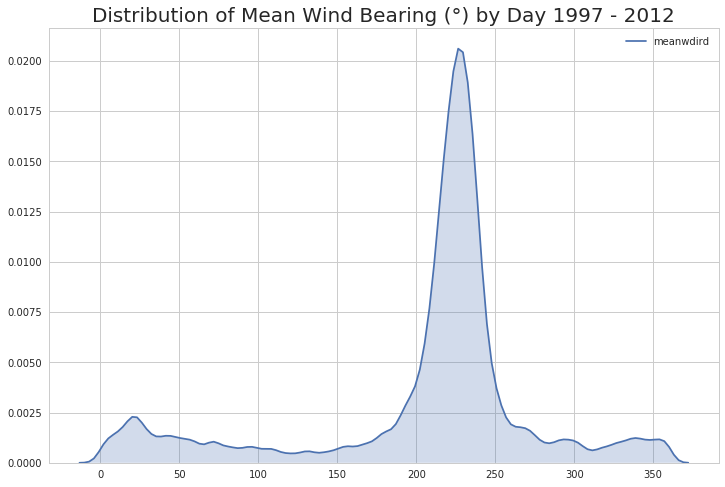

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))

sns.kdeplot(k_means_df['meanwdird'], shade=True)

plt.title("Distribution of Mean Wind Bearing (°) by Day {} - {}".format(year_min, year_max), 
          fontsize=20);

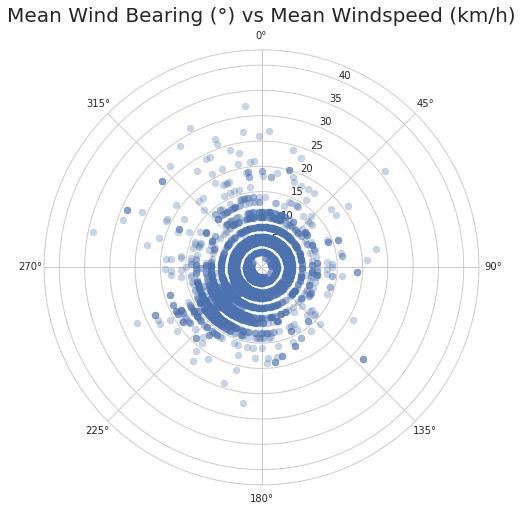

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in k_means_df['meanwdird'].values], 
           y=k_means_df['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h)', fontsize=20);

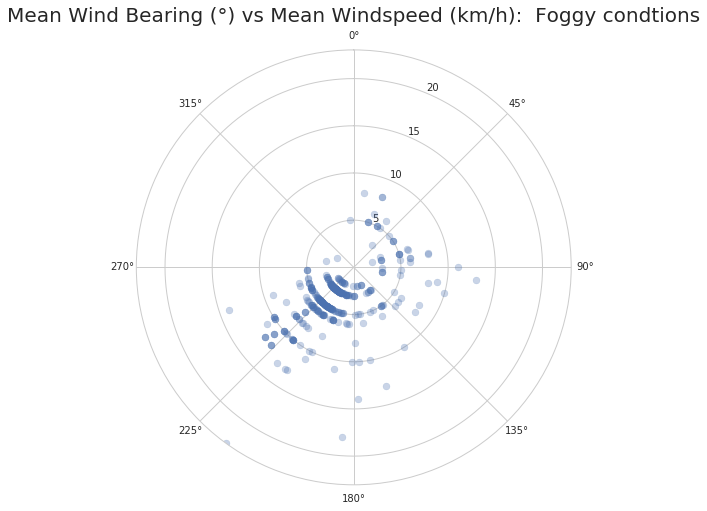

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['fog']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['fog']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h):  Foggy condtions', fontsize=20);

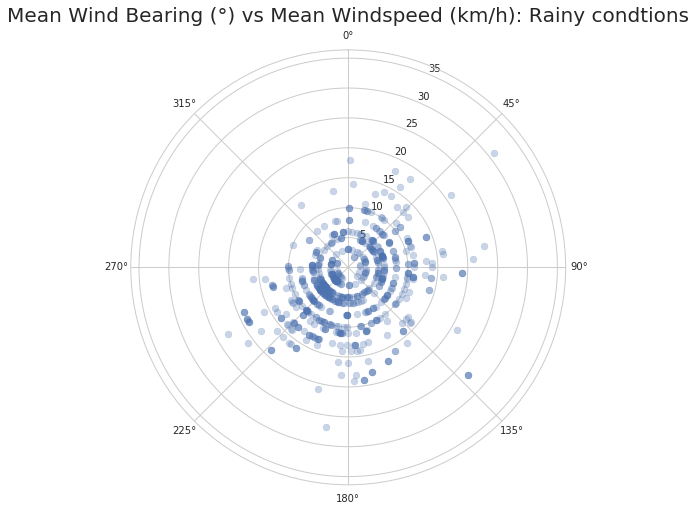

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['rain']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['rain']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h): Rainy condtions', fontsize=20);

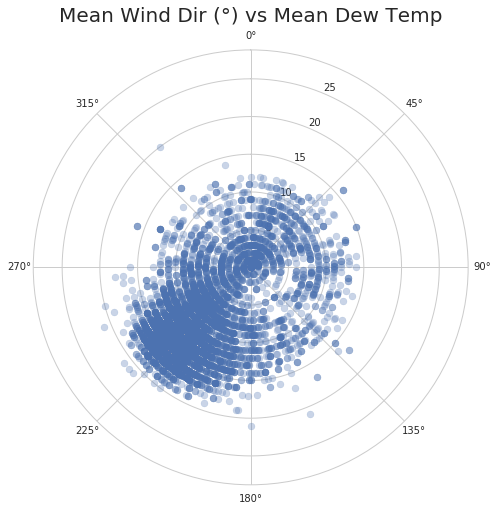

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meandewptm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Dir (°) vs Mean Dew Temp', fontsize=20);

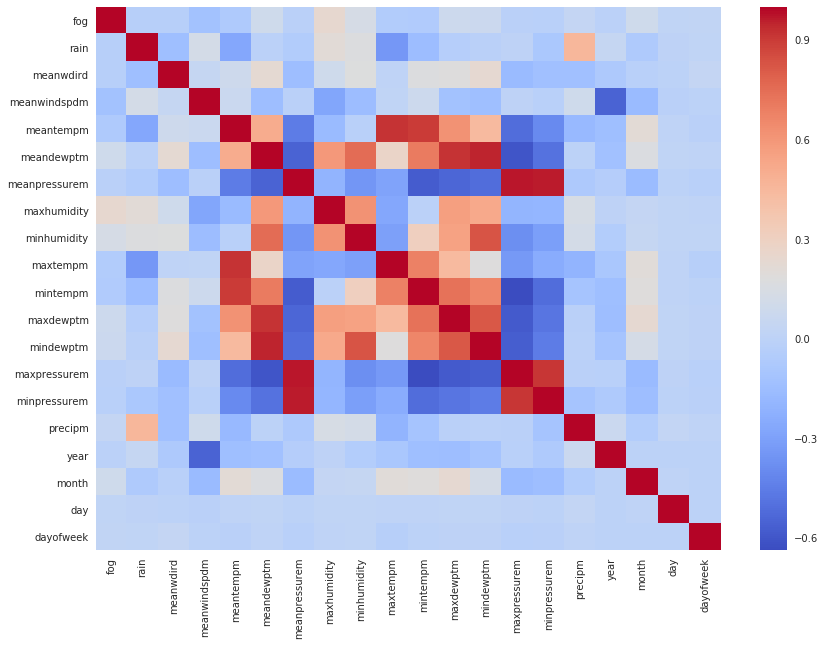

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(combined_weather_df.corr(), cmap='coolwarm');

In [ ]:
x, y, c = ['meandewptm', 'meanpressurem', 'fog']

In [ ]:
combined_weather_df.dropna(inplace=True)

In [ ]:
x_label = combined_weather_df[x]
y_label = combined_weather_df[y]
c_label = combined_weather_df[c]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(combined_weather_df[[x, y, c]])

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x_label, y_label, c=kmeans.labels_, cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(x_label, y_label, c=c_label, cmap='rainbow')